In [1]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *

import seaborn as sns
'''this script concate each block per subject to a file wihthin subject called s103_df_concat.csv'''

'''subsequently save a concatenante file under rechain-beh called all_df_concat.csv '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [2]:
CODE_DIR = "/home/jenny/evidence-chain/"
FIG_DIR = os.path.join(CODE_DIR, "figs/descriptive/")

In [39]:
list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']


# df = df[df['stimDur'] == 0.1]
# df = df[df['stimDur'] != 0.05]


/tmp/ipykernel_588424/485541863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_588424/485541863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_588424/485541863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [40]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [41]:
df.shape

(8450, 13)

In [42]:

# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)



In [43]:
df

,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ...",9
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ...",7
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ...",7
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...",4
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.3166489601135254,2308,[1],23,0,0.10,0.12,[-1. 1. 1. -1. -1. -1. -1. 1. 1. -1. -1. -...,9,"[-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, ...",s113,"[-1.0, 0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, ...",21
996,2.599961996078491,2590,[1],25,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. 1. -1. -1. -1. ...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0...",23
997,2.2333149909973145,2225,[1],22,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. -1. 1. 1. -1. -...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, ...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -1....",20
998,2.3499770164489746,2342,[1],23,0,0.10,0.12,[-1. 1. -1. -1. -1. -1. -1. 1. -1. 1. 1. -...,9,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0,...",s113,"[-1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -4.0...",21


In [44]:

# calculate terminated chains
cumsum_stop_list = []

for c in range(cumsum.shape[0]):
    cumsum_stop = cumsum[
        c, : int(count[c]+1)
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)
 



In [45]:
level_at_response = [i[-1] for i in cumsum_stop_list]
resp = df['key'].tolist()

acc = []
bound = []
for num, k in zip(level_at_response, resp):
    if (num <= 0 and k == 0) or (num >= 0 and k == 1):
        acc.append(1)
    else:
        acc.append(0)
    bound.append(np.abs(num))
print(sum(acc))
df['acc'] = acc
df['bound'] = bound

7425


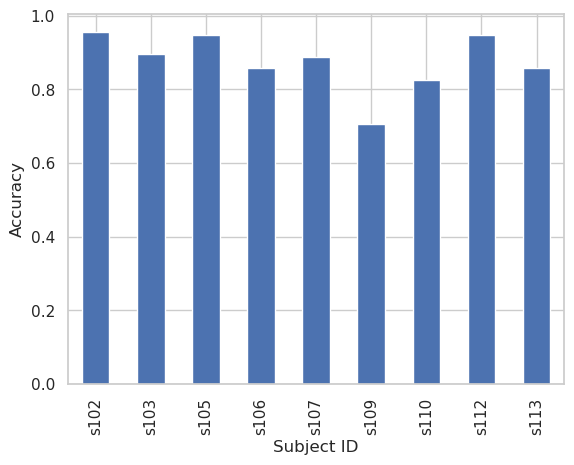

In [107]:
fig, ax = plt.subplots()
result = df.groupby('sid')['acc'].mean()
result.plot.bar(y = 'Accuracy', ax=ax)
ax.set_xlabel("Subject ID")
ax.set_ylabel("Accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_subject.png', dpi=300)

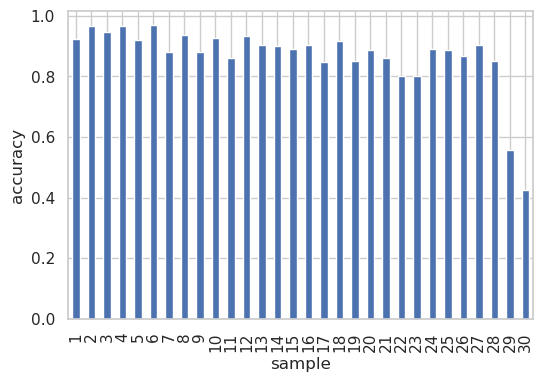

In [108]:
fig, ax = plt.subplots(figsize = (6,4))

df.groupby('count_corrected')['acc'].mean().plot.bar(ax=ax)
ax.set_xticklabels((np.arange(1,31)))
ax.set_xlabel("sample")
ax.set_ylabel("accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_sample.png', dpi=300)

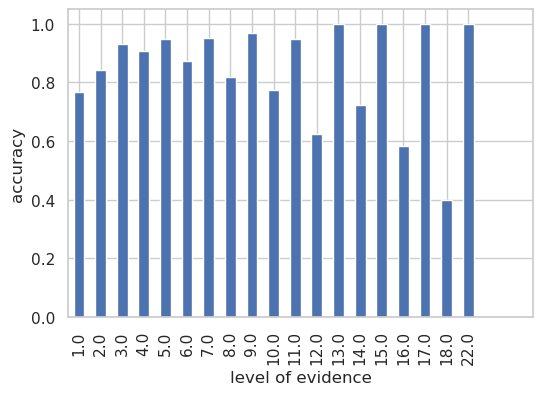

In [109]:
fig, ax = plt.subplots(figsize = (6,4))

df.groupby('bound')['acc'].mean().plot.bar(ax=ax)
ax.set_xlim(0.5,22)
ax.set_xlabel("level of evidence")
ax.set_ylabel("accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_bound.png', dpi=300)

In [79]:
sum(df['bound']==6)

554

In [77]:
df1 = df.loc[df['bound']==6]

<Axes: xlabel='count_corrected'>

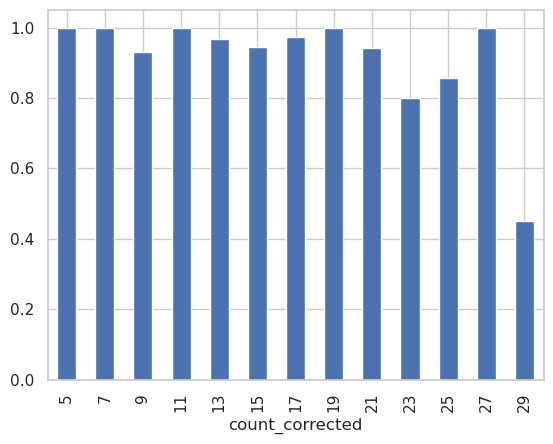

In [80]:
fig, ax = plt.subplots()
df1.groupby('count_corrected')['acc'].mean().plot.bar(ax=ax)

Text(0, 0.5, 'Number of Trials')

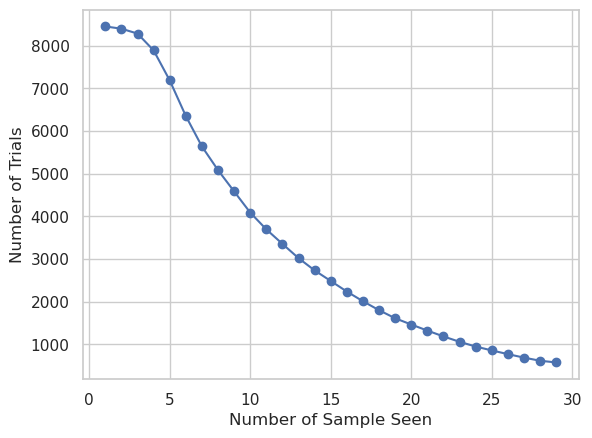

In [298]:
nTrials = []
for stop_sample in range(0, 29):
    dataset, dataset_resp = make_dataset(stop_sample, count, chain_matrix)

    nTrials.append(dataset.shape[0])
plt.plot(np.arange(1, 30), np.array(nTrials), "o-")
plt.xlabel("Number of Sample Seen")
plt.ylabel("Number of Trials")



8450
0.006272189349112426
8397
0.013576277241872096
8283
0.04756730653144996
7889
0.08911142096590188
7186
0.11633732257166714
6350
0.11244094488188977
5636
0.09847409510290986
5081
0.09820901397362723
4582
0.10824967263203841
4086
0.09642682329907
3692
0.09209100758396534
3352
0.09994033412887827
3017
0.0951276102088167
2730
0.09084249084249084
2482
0.0999194198227236
2234
0.10161145926589078
2007
0.10463378176382661
1797
0.10517529215358931
1608
0.0914179104477612
1461
0.0971937029431896
1319
0.10386656557998483
1182
0.1065989847715736
1056
0.10511363636363637
945
0.0962962962962963
854
0.10187353629976581
767
0.10691003911342895
685
0.10656934306569343
612
0.06535947712418301
572
0.015734265734265736


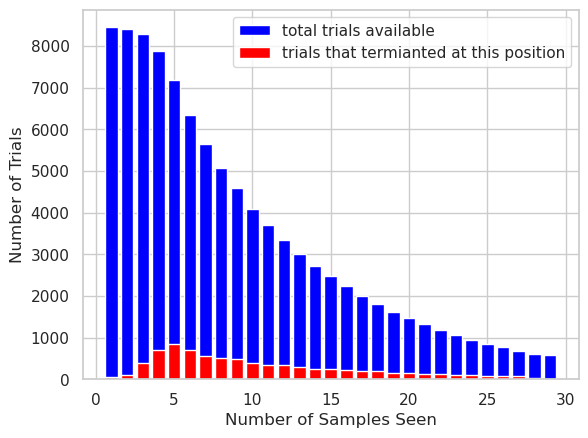

In [299]:
# percentage of trials people terminal at each sample position 

my_labels =['total trials available', 'trials that termianted at this position']
for stop_sample in range(0, 29):
    dataset, dataset_resp = make_dataset(stop_sample, count, chain_matrix)
    plt.bar(stop_sample+1, len(dataset), color='blue', label=my_labels[0])
    plt.bar(stop_sample+1, dataset_resp.sum(),color='red', label=my_labels[1])
    my_labels = ['__nolabels__']*2
    # size of the samples 
    print(len(dataset))                                                         
    # percentage of termination
    print(dataset_resp.sum() / len(dataset))

plt.xlabel("Number of Samples Seen")
plt.ylabel("Number of Trials")
plt.legend()
plt.show()

In [300]:
df.shape

(8450, 14)

In [301]:
chain_matrix = get_chain_matrix(sequence, count)


In [302]:
dataset, dataset_resp = make_dataset(12, count, chain_matrix)


In [303]:
bound = get_abs_evidence(dataset)[:,-1]

/tmp/ipykernel_546357/60570793.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


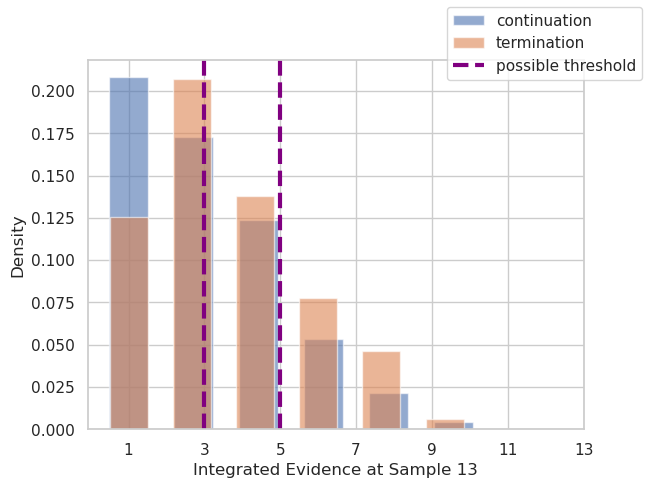

In [304]:

x = bound[dataset_resp]

fig, ax = plt.subplots()



ax.hist(bound[~dataset_resp], alpha=0.6, density=True,bins=7, label = 'continuation',align='left',rwidth=0.6)
ax.hist(bound[dataset_resp],alpha=0.6, density=True, bins=6,  label = 'termination', align='left',rwidth=0.6)

ax.set_xlabel("Integrated Evidence at Sample 13")
ax.set_ylabel("Density")
ax.set_xticks(np.arange(1,14,2))

ax.axvline(x=3, linewidth = 3, label = 'possible threshold', color= 'purple',linestyle = '--')
ax.axvline(x=5, linewidth = 3, color= 'purple',linestyle = '--')


fig.legend()
fig.show()
fig.savefig(f'{FIG_DIR}signal_detection_example.png', dpi=300)



In [305]:
np.unique(bound[dataset_resp], return_counts=True)

(array([ 1.,  3.,  5.,  7.,  9., 11.]), array([60, 99, 66, 37, 22,  3]))

In [306]:
ax.get_xticks()

array([ 1,  3,  5,  7,  9, 11, 13])